#        Mass shooting in America Dataset
### Cleaning and Preparing

In [1]:
import pandas as pd  #Data Analysis and structure library 
import csv           #Implements classes to read and write tabular data in csv format
import numpy as np   #Scientific Library
import scipy as sp   #Scientific and technical Computing library
import seaborn as sns#Data visualization library
import matplotlib.pyplot as plt #2D plotting library
plt.style.use('ggplot')#Plotting system to make plots look professional.Shows the graphs in line
%matplotlib inline  
import plotly as py  #Data analysis and graphing tool
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot #Plotly can work online or offline on jupyter notebook
init_notebook_mode(connected=True) #Initiate Plotly to plot graphs offline

#### Preparing the Data

In [2]:
#Load dataset
filename = "Mass_Shootings_Dataset.csv" #csv file that needs to be cleaned

#By opening the csv file in this format using pandas all the empty values become NaN.
df = pd.read_csv(filename, header=0, index_col=None, usecols= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) 

#The first and the last two columns have been elimiated
df.head()

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender
0,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,26,NaN,NaN,No,White,M
1,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,47,NaN,NaN,No,White,M
2,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,37,NaN,Advance Granite Store,No,Black,M
3,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,64,NaN,NaN,Unclear,White,M
4,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,0.0,38,1.0,NaN,Yes,Asian,M


In [3]:
#Summary of thr dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 18 columns):
Title                   323 non-null object
Location                278 non-null object
Date                    323 non-null object
Incident Area           261 non-null object
Open/Close Location     295 non-null object
Target                  318 non-null object
Cause                   246 non-null object
Summary                 323 non-null object
Fatalities              323 non-null int64
Injured                 323 non-null int64
Total victims           323 non-null int64
Policeman Killed        317 non-null float64
Age                     179 non-null object
Employeed (Y/N)         67 non-null float64
Employed at             41 non-null object
Mental Health Issues    323 non-null object
Race                    321 non-null object
Gender                  323 non-null object
dtypes: float64(2), int64(3), object(13)
memory usage: 45.5+ KB


In [4]:
#Dimentionality of the dataframe
print("Data Dimensions are: ", df.shape, '\n')

Data Dimensions are:  (323, 18) 



There seems to be many Null values in certain columns.

In [5]:
#Detect any missing value
df.isnull().sum()

Title                     0
Location                 45
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues      0
Race                      2
Gender                    0
dtype: int64

### Cleaning each column required

#### Location
It can be seen below that the Location column consists of the City and State where the shootings took place in America. Some state names are inconsistent as some states are abbreviated, for example California is also written as CA. This untidy data will be cleaned.

In [6]:
#Number of Locations
df.Location.value_counts()

Seattle, Washington                  5
Phoenix, Arizona                     4
Killeen, Texas                       4
Omaha, Nebraska                      3
Chicago, Illinois                    3
Las Vegas, Nevada                    3
Cleveland, Ohio                      3
Tucson, Arizona                      3
Los Angeles, California              3
New Orleans, Louisiana               3
Orlando, Florida                     3
Dallas, Texas                        3
Birmingham, Alabama                  2
Miami, Florida                       2
Louisville, Kentucky                 2
Fort Lauderdale, Florida             2
Atlanta, Georgia                     2
Tulsa, Oklahoma                      2
San Bernardino, California           2
Carthage, North Carolina             2
Minneapolis, Minnesota               2
Aurora, Colorado                     2
San Diego, California                2
San Francisco, CA                    2
Hesston, Kansas                      2
Jacksonville, Florida    

In [7]:
#A new column called 'State' is created that will consist of only the State names from the Location column
df['State'] = df['Location'].str.rpartition(',')[2]
#No abbreviation will be used.
df['State'] = df.State.str.replace('CA', 'California')
df['State'] = df.State.str.replace('NV', 'Nevada')
df['State'] = df.State.str.replace('LA', 'Louisiana')
df['State'] = df.State.str.replace('PA', 'Pennsylvania')
df['State'] = df.State.str.replace('WA', 'Washington D.C.')
df['State'] = df.State.str.replace('TX', 'Texas')
df['State'] = df.State.str.replace('CO', 'Colorado')
df['State'] = df.State.str.replace('TX', 'Texas')
df['State'] = df.State.str.replace('MD', 'Maryland')

#The State column replaces the Location column, thus Location is dropped.
df = df.drop(['Location'],axis=1)

#Number of States
df.State.value_counts()

 California         31
 Florida            20
 Texas              17
 Washington         14
 Georgia            13
 Arizona            11
 North Carolina     11
 Ohio               10
 New York           10
 Alabama             9
 Illinois            9
 Pennsylvania        9
 Wisconsin           9
 Colorado            7
 Nevada              6
 Michigan            6
 Kentucky            5
 Louisiana           5
 South Carolina      5
 Virginia            5
 Oklahoma            5
 Tennessee           5
 Mississippi         4
 Oregon              4
 Minnesota           4
 Kansas              4
 Massachusetts       4
 Connecticut         3
 Nebraska            3
 Missouri            3
 New Jersey          3
 New Mexico          3
 Montana             2
 Arkansas            2
 Utah                2
  Virginia           1
 Maryland            1
 Maine               1
Washington D.C.      1
 Alaska              1
 South Dakota        1
 West Virginia       1
 Texas               1
 Hawaii    

#### Date

In [8]:
#Using only the year. 0 is the day of the month, 1 is the month and 2 is the year.
df["Year"] = [each.split("/")[2] for each in df.Date]

#The Year column replaces the Date column, thus Date is dropped
df = df.drop(['Date'],axis=1)

df.head(5)

,Title,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,State,Year
0,Texas church mass shooting,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,26,NaN,NaN,No,White,M,Texas,2017
1,Walmart shooting in suburban Denver,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,47,NaN,NaN,No,White,M,Colorado,2017
2,Edgewood businees park shooting,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,37,NaN,Advance Granite Store,No,Black,M,Maryland,2017
3,Las Vegas Strip mass shooting,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,64,NaN,NaN,Unclear,White,M,Nevada,2017
4,San Francisco UPS shooting,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,0.0,38,1.0,NaN,Yes,Asian,M,California,2017


#### Incident Area

In [9]:
df['Incident Area'].value_counts()

Home                                                43
Workplace                                            8
Home+School                                          7
Church                                               5
street                                               4
Club                                                 4
Fort Hood Army Post                                  3
Shopping Mall                                        3
School                                               3
restaurant parking                                   2
backyard of a house                                  2
restaurant                                           2
fraternity house party                               2
nightclub                                            2
health clinic                                        2
outside the house                                    2
Bart Township                                        2
Nursing Home                                         2
Apartment 

In [10]:
#Creating a column called Shootout Area with NaN values based on Incident Area
df['Shootout Area'] = np.nan

#Locating a string and puts it into a category where the shootout took place (school, religious building, store, party, work, home, street, gas station, airport and hospital )
df.loc[df['Incident Area'].str.contains("University",case=False, na=False), 'Shootout Area'] = 'school'
df.loc[df['Incident Area'].str.contains("school",case=False, na=False), 'Shootout Area'] = 'school'
df.loc[df['Incident Area'].str.contains("Amarillo, Texas",case=False, na=False), 'Shootout Area'] = 'school'
df.loc[df['Incident Area'].str.contains("Hall",case=False, na=False), 'Shootout Area'] = 'school'
df.loc[df['Incident Area'].str.contains("college",case=False, na=False), 'Shootout Area'] = 'school'
df.loc[df['Incident Area'].str.contains("dormitory",case=False, na=False), 'Shootout Area'] = 'school'
df.loc[df['Incident Area'].str.contains("lecture",case=False, na=False), 'Shootout Area'] = 'school'
df.loc[df['Incident Area'].str.contains("scool",case=False, na=False), 'Shootout Area'] = 'school'
df.loc[df['Incident Area'].str.contains("academy",case=False, na=False), 'Shootout Area'] = 'school'
df.loc[df['Incident Area'].str.contains("classroom",case=False, na=False), 'Shootout Area'] = 'school'

df.loc[df['Incident Area'].str.contains("Church",case=False, na=False), 'Shootout Area'] = 'religious building'
df.loc[df['Incident Area'].str.contains("temple",case=False, na=False), 'Shootout Area'] = 'religious building'
df.loc[df['Incident Area'].str.contains("monastery",case=False, na=False), 'Shootout Area'] = 'religious building'


df.loc[df['Incident Area'].str.contains("Wal-Mart",case=False, na=False), 'Shootout Area'] = 'store'
df.loc[df['Incident Area'].str.contains("mall",case=False, na=False), 'Shootout Area'] = 'store'
df.loc[df['Incident Area'].str.contains("store",case=False, na=False), 'Shootout Area'] = 'store'
df.loc[df['Incident Area'].str.contains("shop",case=False, na=False), 'Shootout Area'] = 'store'
df.loc[df['Incident Area'].str.contains("Restaurant",case=False, na=False), 'Shootout Area'] = 'store'
df.loc[df['Incident Area'].str.contains("salon",case=False, na=False), 'Shootout Area'] = 'store'
df.loc[df['Incident Area'].str.contains("spa",case=False, na=False), 'Shootout Area'] = 'store'
df.loc[df['Incident Area'].str.contains("Cafe",case=False, na=False), 'Shootout Area'] = 'store'
df.loc[df['Incident Area'].str.contains("grocery",case=False, na=False), 'Shootout Area'] = 'store'
df.loc[df['Incident Area'].str.contains("mart",case=False, na=False), 'Shootout Area'] = 'store'

df.loc[df['Incident Area'].str.contains("concert",case=False, na=False), 'Shootout Area'] = 'party'
df.loc[df['Incident Area'].str.contains("party",case=False, na=False), 'Shootout Area'] = 'party'
df.loc[df['Incident Area'].str.contains("neighborhood",case=False, na=False), 'Shootout Area'] = 'party'
df.loc[df['Incident Area'].str.contains("club",case=False, na=False), 'Shootout Area'] = 'party'
df.loc[df['Incident Area'].str.contains("pub",case=False, na=False), 'Shootout Area'] = 'party'


df.loc[df['Incident Area'].str.contains("facility",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("grocery",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("Inc",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("Edmond, Oklahoma",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("ESL in Sunnyvale",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("Chuck",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("Edgewater Technology",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("Office",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("Company",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("work",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("conference",case=False, na=False), 'Shootout Area'] = 'work'
df.loc[df['Incident Area'].str.contains("firm",case=False, na=False), 'Shootout Area'] = 'work'

df.loc[df['Incident Area'].str.contains("home",case=False, na=False), 'Shootout Area'] = 'home'
df.loc[df['Incident Area'].str.contains("apartment",case=False, na=False), 'Shootout Area'] = 'home'
df.loc[df['Incident Area'].str.contains("house",case=False, na=False), 'Shootout Area'] = 'home'

df.loc[df['Incident Area'].str.contains("street",case=False, na=False), 'Shootout Area'] = 'street'
df.loc[df['Incident Area'].str.contains("park",case=False, na=False), 'Shootout Area'] = 'street'
df.loc[df['Incident Area'].str.contains("train",case=False, na=False), 'Shootout Area'] = 'street'
df.loc[df['Incident Area'].str.contains("forests of Birchwood",case=False, na=False), 'Shootout Area'] = 'street'
df.loc[df['Incident Area'].str.contains("street",case=False, na=False), 'Shootout Area'] = 'street'
df.loc[df['Incident Area'].str.contains("lot",case=False, na=False), 'Shootout Area'] = 'street'
df.loc[df['Incident Area'].str.contains("walk",case=False, na=False), 'Shootout Area'] = 'street'
df.loc[df['Incident Area'].str.contains("highway",case=False, na=False), 'Shootout Area'] = 'street'
df.loc[df['Incident Area'].str.contains("interstate",case=False, na=False), 'Shootout Area'] = 'street'

df.loc[df['Incident Area'].str.contains("gas",case=False, na=False), 'Shootout Area'] = 'gas-Station'

df.loc[df['Incident Area'].str.contains("airport",case=False, na=False), 'Shootout Area'] = 'airport'

df.loc[df['Incident Area'].str.contains("clinic",case=False, na=False), 'Shootout Area'] = 'hospital'
df.loc[df['Incident Area'].str.contains("Hospital",case=False, na=False), 'Shootout Area'] = 'hospital'

#Drop the column Incident area as it has been replaced by the Shootout Area column
df = df.drop(['Incident Area'],axis=1)

In [11]:
#Number of values in the new column
df['Shootout Area'].value_counts()

home                  75
school                52
work                  27
store                 23
party                 21
street                20
religious building     7
gas-Station            3
hospital               3
airport                2
Name: Shootout Area, dtype: int64

In [12]:
df.head(5)

,Title,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,State,Year,Shootout Area
0,Texas church mass shooting,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,26,NaN,NaN,No,White,M,Texas,2017,religious building
1,Walmart shooting in suburban Denver,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,47,NaN,NaN,No,White,M,Colorado,2017,store
2,Edgewood businees park shooting,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,37,NaN,Advance Granite Store,No,Black,M,Maryland,2017,store
3,Las Vegas Strip mass shooting,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,64,NaN,NaN,Unclear,White,M,Nevada,2017,gas-Station
4,San Francisco UPS shooting,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,0.0,38,1.0,NaN,Yes,Asian,M,California,2017,work


#### Open/Close Location

In [13]:
df['Open/Close Location'].value_counts()

Close         197
Open           78
Open+Close     19
Open+CLose      1
Name: Open/Close Location, dtype: int64

In [14]:
#Fixing the typing error
df['Open/Close Location'].replace(['Open+CLose'],
                                  ['Open+Close'], inplace=True)

In [15]:
df['Open/Close Location'].value_counts()

Close         197
Open           78
Open+Close     20
Name: Open/Close Location, dtype: int64

#### Target

In [16]:
df.Target.value_counts()

random                       140
Family                        37
Coworkers                     17
Students                      16
Students+Teachers             14
Ex-Coworkers                   9
party guests                   8
Ex-Wife                        7
Policeman                      7
coworkers                      5
Teachers                       5
neighbors                      4
Ex-Wife & Family               3
police                         2
Children                       2
Ex-Girlfriend                  2
Friends                        2
school girls                   2
Policeman+Council Member       1
Sikhs                          1
Ex-girlfriend                  1
Marines                        1
TSA Officer                    1
drug dealer                    1
Ex-GirlFriend                  1
Ex-Girlfriend & Family         1
monks                          1
partner's family               1
Social Workers                 1
prayer group                   1
Congresswo

In [17]:
#Creating a new column with NaN values based on the Target Column
df['Target Victims'] = np.nan
#Target categories ()
df.loc[df['Target'].str.contains("random",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("women",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("children",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("postmaster",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("welding shop employees",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("drug",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("protestors",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("neighbor",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("marines",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("House",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("Sikhs",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("men",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("players",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("hunters",case=False, na=False), 'Target Victims'] = 'random'
df.loc[df['Target'].str.contains("prayer",case=False, na=False), 'Target Victims'] = 'random'

df.loc[df['Target'].str.contains("school",case=False, na=False), 'Target Victims'] = 'school'
df.loc[df['Target'].str.contains("Students",case=False, na=False), 'Target Victims'] = 'school'
df.loc[df['Target'].str.contains("Teachers",case=False, na=False), 'Target Victims'] = 'school'

df.loc[df['Target'].str.contains("uninvited guests",case=False, na=False), 'Target Victims'] = 'party guests'
df.loc[df['Target'].str.contains("birthday party bus",case=False, na=False), 'Target Victims'] = 'party guests'

df.loc[df['Target'].str.contains("police",case=False, na=False), 'Target Victims'] = 'police'
df.loc[df['Target'].str.contains("Trooper",case=False, na=False), 'Target Victims'] = 'police'


df.loc[df['Target'].str.contains("Ex-Coworkers",case=False, na=False), 'Target Victims'] = 'work'
df.loc[df['Target'].str.contains("coworkers",case=False, na=False), 'Target Victims'] = 'work'

df.loc[df['Target'].str.contains("Family",case=False, na=False), 'Target Victims'] = 'family'
df.loc[df['Target'].str.contains("ex",case=False, na=False), 'Target Victims'] = 'family'
df.loc[df['Target'].str.contains("Friends",case=False, na=False), 'Target Victims'] = 'family'

In [18]:
df = df.drop(['Target'],axis=1)

df['Target Victims'].value_counts()

random          159
family           69
school           38
work             22
police           11
party guests      2
Name: Target Victims, dtype: int64

#### Cause

In [19]:
df.Cause.value_counts()

psycho                  68
terrorism               65
anger                   44
frustration             18
domestic dispute        12
unemployement           10
revenge                 10
racism                   6
unknown                  4
failing exams            3
robbery                  1
breakup                  1
suspension               1
drunk                    1
religious radicalism     1
domestic disputer        1
Name: Cause, dtype: int64

In [20]:
#Replacing the typing error
df['Cause'].replace(['domestic disputer'],
                ['domestic dispute'], inplace=True)

df.Cause.value_counts()

psycho                  68
terrorism               65
anger                   44
frustration             18
domestic dispute        13
unemployement           10
revenge                 10
racism                   6
unknown                  4
failing exams            3
robbery                  1
breakup                  1
suspension               1
drunk                    1
religious radicalism     1
Name: Cause, dtype: int64

#### Age

In [21]:
#Changing the label name
df['Shooter\'s Age'] = df['Age']
df = df.drop(['Age'],axis=1)
#Sometimes there may be many shooters whose ages will be mentioned as 19,33. This data is kept as it is
df

,Title,Open/Close Location,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,State,Year,Shootout Area,Target Victims,Shooter's Age
0,Texas church mass shooting,Close,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,NaN,NaN,No,White,M,Texas,2017,religious building,random,26
1,Walmart shooting in suburban Denver,Open,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,NaN,NaN,No,White,M,Colorado,2017,store,random,47
2,Edgewood businees park shooting,Close,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,NaN,Advance Granite Store,No,Black,M,Maryland,2017,store,work,37
3,Las Vegas Strip mass shooting,Open,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,NaN,NaN,Unclear,White,M,Nevada,2017,gas-Station,random,64
4,San Francisco UPS shooting,Close,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,0.0,1.0,NaN,Yes,Asian,M,California,2017,work,work,38
5,Pennsylvania supermarket shooting,Close,terrorism,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,NaN,1.0,Weis grocery,Unclear,White,M,Pennsylvania,2017,work,work,24
6,Florida awning manufacturer shooting,Close,unemployement,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,NaN,1.0,manufacturer Fiamma Inc.,Unclear,NaN,M,Florida,2017,work,work,45
7,Rural Ohio nursing home shooting,Close,NaN,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,1.0,1.0,some nursing home,Yes,White,M,Ohio,2017,home,work,43
8,Fresno downtown shooting,Open,racism,"Kori Ali Muhammad, 39, opened fire along a str...",3,0,3,NaN,NaN,NaN,Unclear,Black,M,California,2017,street,random,39
9,Fort Lauderdale airport shooting,Close,terrorism,"Esteban Santiago, 26, flew from Alaska to Fort...",5,6,11,NaN,NaN,NaN,Yes,Latino,M,Florida,2017,airport,random,26


#### Mental Health Issues

In [22]:
df['Mental Health Issues'].value_counts()

Unknown    110
Yes        106
No          93
Unclear     13
unknown      1
Name: Mental Health Issues, dtype: int64

In [23]:
df['Mental Health Issues'].replace(['Unclear','unknown'],
                ['Unknown','Unknown'], inplace=True)
df['Mental Health Issues'].value_counts()

Unknown    124
Yes        106
No          93
Name: Mental Health Issues, dtype: int64

#### Race

In [24]:
df.Race.value_counts()

White American or European American                    122
Black American or African American                      76
Unknown                                                 42
Some other race                                         20
white                                                   12
Asian American                                          11
White                                                    9
Asian                                                    6
Latino                                                   5
Black                                                    5
black                                                    3
Native American or Alaska Native                         3
Other                                                    2
Two or more races                                        2
White American or European American/Some other Race      1
Asian American/Some other race                           1
Black American or African American/Unknown              

In [25]:
#Lets group them into White, Black, Asian American, Latino, Native American and other.
df['Race'].replace(['white', 'black', 'Some other race', 'unclear'],
                ['White', 'Black', 'Other','Unknown'], inplace=True)

df['Race'].replace(['White American or European American', 'White American or European American/Some other Race'], 
                          ['White', 'White'], inplace=True)

df['Race'].replace(['Black American or African American','Black American or African American/Unknown'], 
                   ['Black', 'Black'], inplace=True)

df['Race'].replace(['Asian', 'Asian American/Some other race'], 
                   ['Asian American', 'Asian American'], inplace=True)

df['Race'].replace(['Unknown', 'Some other race', 'Two or more races'], 
                   ['Other', 'Other' ,'Other'], inplace=True)

df['Race'].replace(['Native American or Alaska Native'], 
                   ['Native American'], inplace=True)

df.Race.value_counts()

White              144
Black               85
Other               66
Asian American      18
Latino               5
Native American      3
Name: Race, dtype: int64

#### Gender

In [26]:
df.Gender.value_counts()

Male           272
Unknown         21
M               20
Female           5
Male/Female      4
M/F              1
Name: Gender, dtype: int64

In [27]:
#If a value in the Gender column is M/F instead of Male/Female, convert it to Male/Female
df.loc[df.Gender == 'M/F', 'Gender'] = "Male/Female"

#If a value in the Gender column is Female, keep Fermale.
df.loc[df.Gender == 'Female', 'Gender'] = "Female"


#If a value in the Gender column is M, it converts to Male
df.loc[df.Gender == 'M', 'Gender'] = "Male"


#If a value in the Gender Column is not Male or Female but Unknown, let it be Unknown and not Male as the above line 
#converts everything that is not Female into Male.
df.loc[df.Gender == 'Unknown', 'Gender'] = "Unknown" 

df.Race.value_counts()

White              144
Black               85
Other               66
Asian American      18
Latino               5
Native American      3
Name: Race, dtype: int64

In [28]:
# create an array from data in Gender column
gender = np.array(df['Gender'][1:324]) #Starts from the 1st row after the label row.
male = np.where(df['Gender']=="Male")
female = np.where(df['Gender']=="Female")
unknown = np.where(df['Gender']=="Unknown")
m_f = np.where(df['Gender']=="Male/Female")

# output a summary
print("Total Criminals: {}".format(gender.shape[0])) # calling shape on row 0 gives us total number of elements
print("Male Criminals: {}".format(np.count_nonzero(male))) # count_nonzero counts non-zero elements
print("Female Criminals: {}".format(np.count_nonzero(female))) # count_nonzero counts non-zero elements
print("Unknown Criminals: {}".format(np.count_nonzero(unknown))) # count_nonzero counts non-zero elements
print("Male/Female Criminals: {}".format(np.count_nonzero(m_f))) # count_nonzero counts non-zero elements

Total Criminals: 322
Male Criminals: 291
Female Criminals: 5
Unknown Criminals: 21
Male/Female Criminals: 5


In [29]:
p_n_k = np.array(df['Policeman Killed']==0.0) #Starts from the 1st row after the label row.
print("Policemen not killed : {}".format(np.count_nonzero(p_n_k))) # count_nonzero counts non-zero elements
p_k = np.array(df['Policeman Killed']>=1.0) #Starts from the 1st row after the label row.
print("Policemen killed : {}".format(np.count_nonzero(p_k)),'\n') # count_nonzero counts non-zero elements

print(pd.value_counts(df['Policeman Killed']))

Policemen not killed : 298
Policemen killed : 19 

0.0    298
1.0     10
3.0      4
4.0      3
2.0      1
5.0      1
Name: Policeman Killed, dtype: int64


In [30]:
print("MODE: ",df['Policeman Killed'].mode())
print("MIN: ",df['Policeman Killed'].min())
print("MAX: ",df['Policeman Killed'].max())

MODE:  0    0.0
dtype: float64
MIN:  0.0
MAX:  5.0


### Graphs in preparation of Assignment part 2

In [31]:
# Creating trace to show the number of victims killed and injured until 2017
trace = go.Scatter(x = df['Year'],
                   y = df['Total victims'],
                   mode = "lines+markers",
                   marker = dict(color = 'rgba(80, 6, 8, 0.8)'))

data = [trace]
layout = dict(title = 'Total killed and injured in the US shootings between 2014 and 2018',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Number of Attacks',ticklen= 5,zeroline= False))
fig = dict(data = data, layout = layout)
iplot(fig)

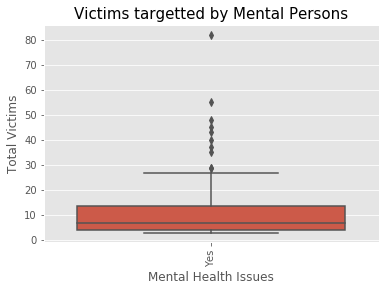

In [32]:
#Potting a box plot using sns to show the number of victims killed by the shooter who had mental health issues when the incident happened
sns.boxplot(x="Mental Health Issues", y="Total victims", data=df[df['Mental Health Issues'] == 'Yes'] )
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Mental Health Issues', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Mental Persons", fontsize=15)
plt.show()

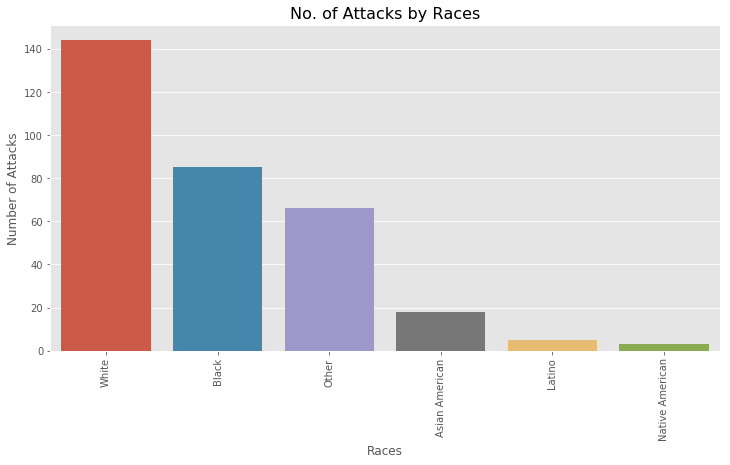

In [33]:
#Plotting a bar plot using sns to show what race the shooter was and how many did he/she attack
race_count = df['Race'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(race_count.index, race_count.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Races', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Races', fontsize=16)
plt.show()

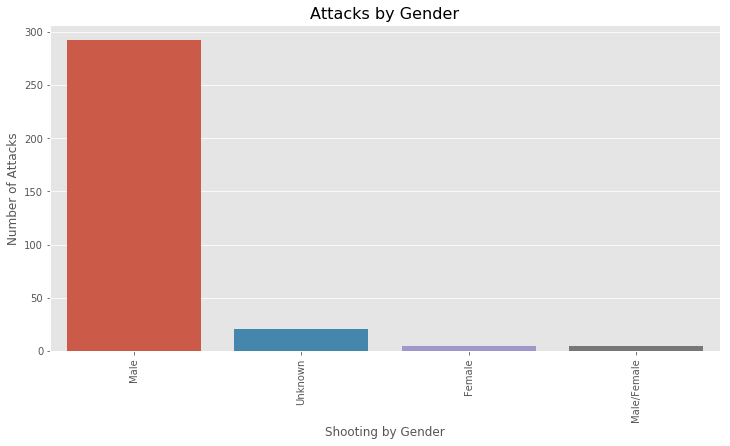

In [34]:
#Plotting a bar plot using sns to show what gender was the shooter and how many did he/she attack
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(gender_count.index, gender_count.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Gender', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Attacks by Gender', fontsize=16)
plt.show()

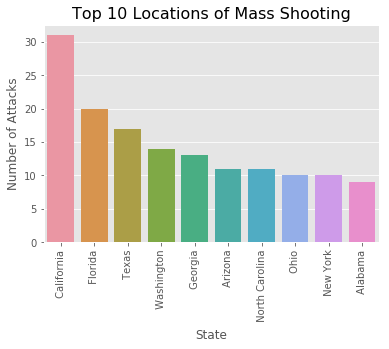

In [35]:
state_count = df['State'].value_counts()
state_count = state_count.head(10)
sns.barplot(state_count.index, state_count.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Locations of Mass Shooting', fontsize=16)
plt.show()

## Clean Dataset

In [36]:
#Creating a new dataset with only the columns that will be needed for Part 2 of the assignment
mass_Shooting = pd.DataFrame(df[['Title',
                                 'Summary',
                                 'State',
                                 'Shootout Area',
                                 'Cause',
                                 'Open/Close Location',
                                 'Target Victims',
                                 'Fatalities',
                                 'Injured',
                                 'Total victims',
                                 'Policeman Killed',
                                 'Shooter\'s Age',
                                 'Gender',
                                 'Mental Health Issues',
                                 'Race',
                                 'Employeed (Y/N)',
                                 'Employed at',
                                 'Year']])
mass_Shooting

,Title,Summary,State,Shootout Area,Cause,Open/Close Location,Target Victims,Fatalities,Injured,Total victims,Policeman Killed,Shooter's Age,Gender,Mental Health Issues,Race,Employeed (Y/N),Employed at,Year
0,Texas church mass shooting,"Devin Patrick Kelley, 26, an ex-air force offi...",Texas,religious building,unknown,Close,random,26,20,46,0.0,26,Male,No,White,NaN,NaN,2017
1,Walmart shooting in suburban Denver,"Scott Allen Ostrem, 47, walked into a Walmart ...",Colorado,store,unknown,Open,random,3,0,3,0.0,47,Male,No,White,NaN,NaN,2017
2,Edgewood businees park shooting,"Radee Labeeb Prince, 37, fatally shot three pe...",Maryland,store,unknown,Close,work,3,3,6,0.0,37,Male,No,Black,NaN,Advance Granite Store,2017
3,Las Vegas Strip mass shooting,"Stephen Craig Paddock, opened fire from the 32...",Nevada,gas-Station,unknown,Open,random,59,527,585,1.0,64,Male,Unknown,White,NaN,NaN,2017
4,San Francisco UPS shooting,"Jimmy Lam, 38, fatally shot three coworkers an...",California,work,NaN,Close,work,3,2,5,0.0,38,Male,Yes,Asian American,1.0,NaN,2017
5,Pennsylvania supermarket shooting,"Randy Stair, a 24-year-old worker at Weis groc...",Pennsylvania,work,terrorism,Close,work,3,0,3,NaN,24,Male,Unknown,White,1.0,Weis grocery,2017
6,Florida awning manufacturer shooting,"John Robert Neumann, Jr., 45, a former employe...",Florida,work,unemployement,Close,work,5,0,5,NaN,45,Male,Unknown,NaN,1.0,manufacturer Fiamma Inc.,2017
7,Rural Ohio nursing home shooting,"Thomas Hartless, 43, shot and killed a former ...",Ohio,home,NaN,Close,work,3,0,3,1.0,43,Male,Yes,White,1.0,some nursing home,2017
8,Fresno downtown shooting,"Kori Ali Muhammad, 39, opened fire along a str...",California,street,racism,Open,random,3,0,3,NaN,39,Male,Unknown,Black,NaN,NaN,2017
9,Fort Lauderdale airport shooting,"Esteban Santiago, 26, flew from Alaska to Fort...",Florida,airport,terrorism,Close,random,5,6,11,NaN,26,Male,Yes,Latino,NaN,NaN,2017
